# Modelo Inicial

In [16]:
import pandas as pd
from adr import dataset,metrics # dataset e metricas
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import tree 
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold 
from sklearn.metrics import confusion_matrix 
from sklearn.utils.multiclass import unique_labels
import sklearn.metrics
from sklearn import tree
from pprint import pprint

%matplotlib inline

In [17]:
# Criando dataframe
df = dataset.autism()
#df.set_index('id', inplace=True)
df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [18]:
# Função de plotagem da matriz de confusão
def plot_confusion_matrix(y_test,result,cmap = plt.cm.Blues):
    # Confusion matrix
    cm = confusion_matrix(y_test,result)
    classe = unique_labels(y_test,result)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classe, yticklabels=classe,
           title= 'Matriz de confusão',
           ylabel='Rótulo real',
           xlabel='Rótulo previsto')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j]),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Feature Engineering
Nessa etapa será selecionado as features que vamos utilizar no modelo baseline.

In [19]:
# Selecionando colunas com os traços comportamentais.
columns = ['A{}_Score'.format(i) for i in range(1,11)]

columns

['A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score']

In [20]:
# Separando em variáveis preditoras X e alvo da nossa predição Y
X = df[columns]
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,1,1,1,1,0,0,1,1,0,0
1,1,1,0,1,0,0,0,1,0,1
2,1,1,0,1,1,0,1,1,1,1
3,1,1,0,1,0,0,1,1,0,1
4,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1
700,1,0,0,0,0,0,0,1,0,1
701,1,0,1,1,1,0,1,1,0,1
702,1,0,0,1,1,0,1,0,1,1


In [21]:
Y = df['Class/ASD']

# Para melhor entendimento do dataset, iremos renomear os valores de Y
Y = Y.replace({'NO':'Sem_Autismo','YES':'Autismo'})
Y

0      Sem_Autismo
1      Sem_Autismo
2          Autismo
3      Sem_Autismo
4      Sem_Autismo
          ...     
699        Autismo
700    Sem_Autismo
701        Autismo
702    Sem_Autismo
703        Autismo
Name: Class/ASD, Length: 704, dtype: object

## Modeling e Analysis
Nessa etapa aplicaremos o modelo que foi selecionado e com isso a contrução das predições do nosso modelo baseline.

Modelo selecionado: Decision Tree
Motivo: Fácil compreensão.

In [22]:
# Criação do modelo

baseline = tree.DecisionTreeClassifier()
baseline

DecisionTreeClassifier()

## Treino e Teste

In [23]:
# Separando em treino e teste
x_train,x_test,y_train,y_test = train_test_split(X,Y,
                                                 test_size = 0.4,
                                                 random_state = 40)

# Treinando o modelo
test1 = baseline.fit(x_train,y_train)

results = test1.predict(x_test)
y_pred = results
table = pd.DataFrame(list(zip(y_test, y_pred)), columns=['y_test', 'y_pred'])
table.head()

,y_test,y_pred
0,Sem_Autismo,Sem_Autismo
1,Autismo,Sem_Autismo
2,Autismo,Autismo
3,Autismo,Sem_Autismo
4,Sem_Autismo,Sem_Autismo


In [24]:
print('Exemplos de Falso Negativos')
table[(table.y_test == 'Autismo') & (table.y_pred == 'Sem_Autismo')]

Exemplos de Falso Negativos


,y_test,y_pred
1,Autismo,Sem_Autismo
3,Autismo,Sem_Autismo
5,Autismo,Sem_Autismo
29,Autismo,Sem_Autismo
156,Autismo,Sem_Autismo
159,Autismo,Sem_Autismo
192,Autismo,Sem_Autismo
206,Autismo,Sem_Autismo


In [25]:
print('Exemplos de Falso Positivos')
table[(table.y_test == 'Sem_Autismo') & (table.y_pred == 'Autismo')]

Exemplos de Falso Positivos


,y_test,y_pred
7,Sem_Autismo,Autismo
53,Sem_Autismo,Autismo
128,Sem_Autismo,Autismo
134,Sem_Autismo,Autismo
162,Sem_Autismo,Autismo
222,Sem_Autismo,Autismo


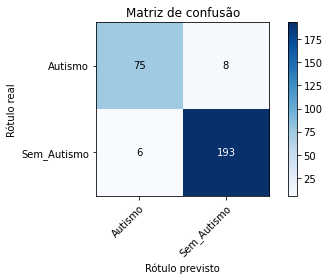

In [26]:
# Informações do modelo
plot_confusion_matrix(y_test,results)
metrics1 = metrics.classification_report(y_test, y_pred, ['Sem_Autismo', 'Autismo'])
plt.show()

In [27]:
print("Métricas do modelo que implementamos: \n")
pprint(metrics1)
print()

print("Métricas já embutidas no sklearn: \n")
print(sklearn.metrics.classification_report(y_test, y_pred))

Métricas do modelo que implementamos: 

{'accuracy': 2.0721649484536084,
 'f1': 0.965,
 'precision': 0.9601990049751243,
 'recall': 0.9698492462311558}

Métricas já embutidas no sklearn: 

              precision    recall  f1-score   support

     Autismo       0.93      0.90      0.91        83
 Sem_Autismo       0.96      0.97      0.96       199

    accuracy                           0.95       282
   macro avg       0.94      0.94      0.94       282
weighted avg       0.95      0.95      0.95       282



##  K-Fold Cross Validation

In [28]:
# Validação cruzada k-fold
#kf  = KFold(n_splits = 5, shuffle = True, random_state = 1)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
print(skf)

StratifiedKFold(n_splits=5, random_state=1, shuffle=True)


Métricas 0 
  
              precision    recall  f1-score   support

     Autismo       0.85      0.87      0.86        38
 Sem_Autismo       0.95      0.94      0.95       103

    accuracy                           0.92       141
   macro avg       0.90      0.91      0.90       141
weighted avg       0.92      0.92      0.92       141

Métricas 1 
  
              precision    recall  f1-score   support

     Autismo       0.86      1.00      0.93        38
 Sem_Autismo       1.00      0.94      0.97       103

    accuracy                           0.96       141
   macro avg       0.93      0.97      0.95       141
weighted avg       0.96      0.96      0.96       141

Métricas 2 
  
              precision    recall  f1-score   support

     Autismo       0.92      0.87      0.89        38
 Sem_Autismo       0.95      0.97      0.96       103

    accuracy                           0.94       141
   macro avg       0.93      0.92      0.93       141
weighted avg       0.94      

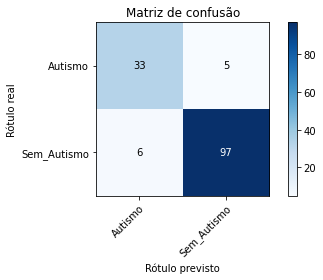

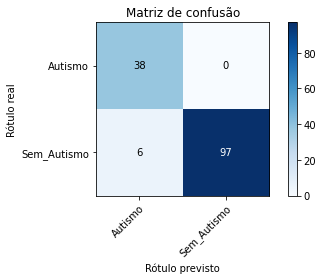

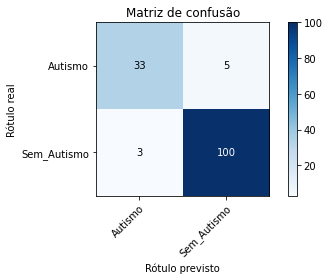

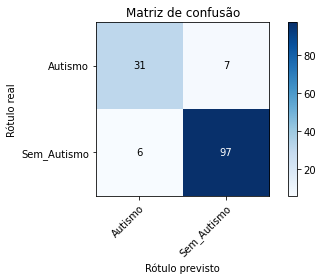

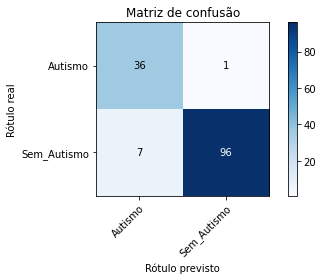

In [29]:
metricas = []
i = 0
# Separando as bases de treino e teste
for train,test in skf.split(X,Y):
    #print(train)
    #print(test)
    # Dicionaro de treino
    train_x, test_x = X.iloc[train], X.iloc[test]
    train_y, test_y = Y.iloc[train], Y.iloc[test]
    aux = baseline.fit(train_x,train_y)
    rst = aux.predict(test_x)
    #metricas.append(metrics.classification_report(test_y, rst, ['Sem_Autismo', 'Autismo']))
    print('Métricas {} \n  \n{}'.format(i, sklearn.metrics.classification_report(test_y, rst)))
    #print('Métrica implementada \n  \n{}'.format(metricas[i]))
    plot_confusion_matrix(test_y,rst)
    i+=1

In [ ]:
# Calculo da Média e Desvio padrão das métricas
ac = np.array([metricas[x]['accuracy'] for x in range(5)])
pc = np.array([metricas[x]['precision'] for x in range(5)])
rc = np.array([metricas[x]['recall'] for x in range(5)])
f1 = np.array([metricas[x]['f1'] for x in range(5)])

# Média e devio padrão
me_ac = np.mean(ac)
std_ac = np.std(ac)

print('Accuracy - média: {} e desvio padrão:: {}'.format(me_ac,std_ac))

me_pc = np.mean(pc)
std_pc = np.std(pc)

print('Precision - média: {} e desvio padrão:: {}'.format(me_pc,std_pc))

me_rc = np.mean(rc)
std_rc = np.std(rc)

print('Recall - média: {} e desvio padrão:: {}'.format(me_rc,std_rc))

me_f1 = np.mean(f1)
std_f1 = np.std(f1)

print('F1 Score - média: {} e desvio padrão:: {}'.format(me_f1,std_f1))

## Feature Importance

In [ ]:
dic = {i:baseline.feature_importances_[v] for v,i in enumerate(X.columns)}
dic

In [ ]:
pd.DataFrame(list(dic.items()), columns=['feature', 'importance']).sort_values(by='importance', ascending=False)

In [ ]:
X.columns

In [ ]:
feature_names = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
text_representation = tree.export_text(test1, feature_names=feature_names)
#r = tree.export_text(test1, feature_names=X.columns)
#print(r)
print(text_representation)

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

import graphviz
# DOT data
dot_data = tree.export_graphviz(test1, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['Sem_Autismo', 'Autismo'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
graph.render("decision_tree_graphivz")

![Árvore de decisão](decision_tree_graphivz.png "Árvore de decisão")